Chapter 4 – Training Models

# Setup

In [8]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Linear Regression

## The Normal Equation

To find the value of Theta that minimizes the cost function, there is a closed-form solution - in other words, a mathematical equation that gives the result directly -> The Normal Equation 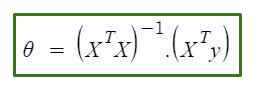

In [9]:
# Let's generate some linear-looking data to test this equation

In [10]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

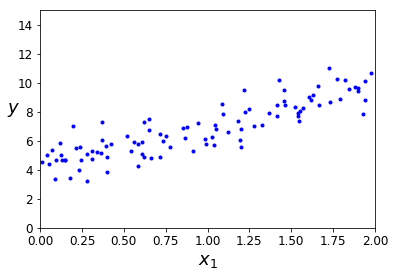

In [11]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [12]:
# Now let's compute theta_hat using the Normal Equation. We will use the inv() function from NumPy's Linear Algebra 
# module (np.linalg) to compute the inverse of a matrix, and the dot() method for matrix multiplication

In [13]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [14]:
theta_best

array([[4.21509616],
       [2.77011339]])

We would have hoped for theta_0 = 4, and theta_1 = 3, but instead theta_0 = 4.215 and theta_1 = 2.770 is close enough. The Gaussian noise made it impossible to recover the exact parameters of the original function

In [15]:
# Now we can make predictions using the solved theta:

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

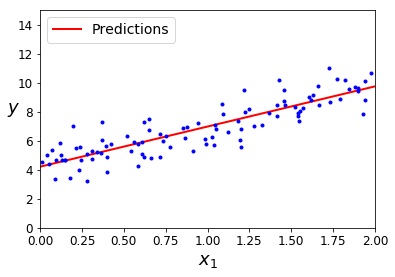

In [16]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

Note: The Normal Equation gets very slow when the numbers of features grows large (e.g., 100,000)

In [42]:
# The equivalent code using Scikit-Learn looks like:

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.56401543]), array([[0.84362064]]))

In [43]:
lin_reg.predict(X_new)

array([[3.56401543],
       [5.25125671]])

# Gradient Descent

## Batch Gradient Descent

Note: When using Gradient Descent, you should ensure that all features have a simlar scale (e.g., using Scikit_learn's StandardScalerclass), or else it will take much longer to converge

Note: Training a model means searching for a combination of model parameters that minimizes a cost function (over the training set). It is a search in the mode's parameter space: the more parameters a model has, the more dimensions this space has, and the harder the search is: 

Searching for a needle in a 300-dimensional haystack is much trickier than in three dimensions. 

Fortunately, since the cost function is convex in the case of Linear Regression, the needle is simply at the bottom of the bowl

Equation 4-5. Partial derivatives of the cost function
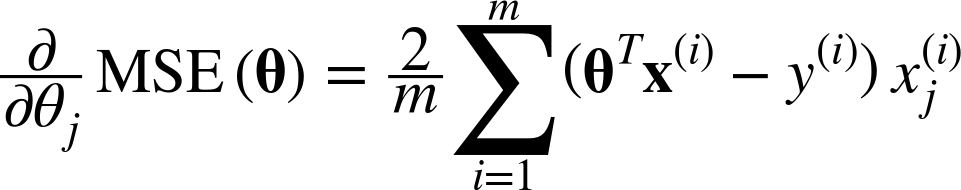

Equation 4-6. Gradient vector of the cost function
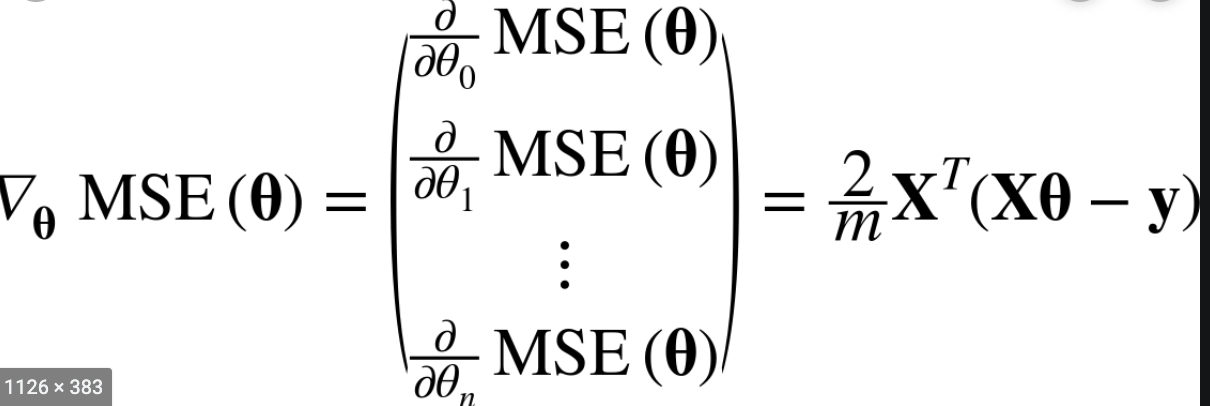

Note: Notice that this formula involves calculations over the full training set X, at each Gradient Descent step! This is why the algorithm is called Batch Gradient Descent; it uses the whole batch of training data at every step. As a result it is terribly slow on very large training sets.

However, Gradient Descent scales well with the number of features; training a Linear Regression model when there are hundreds of thousands of features is much faster using Gradient Descent than using the Normal Equation

In [44]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100
theta = np.random.randn(2, 1) # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [45]:
theta

array([[1.03315352],
       [2.53086191]])

In [46]:
X_new_b.dot(theta)

array([[1.03315352],
       [6.09487734]])

In [47]:
# Let's look when using different learning rates
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

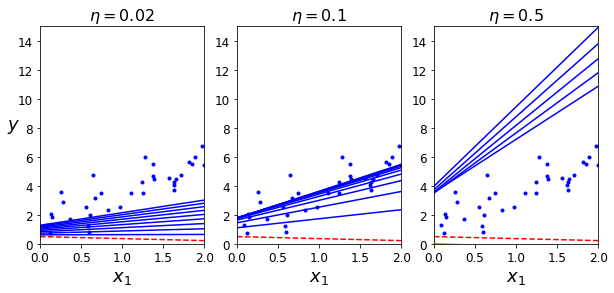

In [48]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

Left: The learning rate is too low: the algorithm will eventually reach the solution, but it will take a long time. 

Middle: The learning rate looks pretty good: in just a few iterations, it has already converged to the solution. 

Right: The learning rate is too high: the algorithm diverges, jumping all over the place and actually getting further and further away from the solution at every step

Note: When the cost function is convex and its slope does not change abrupty, Batch Gradient Descent with a fixed learning rate will eventually converge to the optimal solution, but you may have to wait a while: it can take O(1/e) iterations to reach the optimum within a range of e depending on the shape of the cost function. If you divide the tolerance by 10 to have a more preceise solution, then the algorithm will have to run about 10 times longer.

## Stochastic Gradient Descent

Note: The main problem with Batch Gradient Descent is the fact that it uses the whole training set to compute the gradients at every step, which makes it very slow when the training set is large. 

At the opposite extreme, Stochastic Gradient Descent (aka SGD) just picks a random instance in the training set at every step and computes the gradients based only on that single instance. Result: Faster algorithm, but much less regular in finding the minimum

Simulated Annealing: Gradually reducing the learning rate, to help deal with the randomness dilemma.

Learning Schedule: The function that determines the learning rate at each iteration.

In [49]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

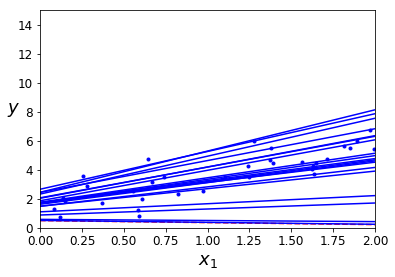

In [50]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    # not shown in the book
            y_predict = X_new_b.dot(theta)           # not shown
            style = "b-" if i > 0 else "r--"         # not shown
            plt.plot(X_new, y_predict, style)        # not shown
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 # not shown

plt.plot(X, y, "b.")                                 # not shown
plt.xlabel("$x_1$", fontsize=18)                     # not shown
plt.ylabel("$y$", rotation=0, fontsize=18)           # not shown
plt.axis([0, 2, 0, 15])                              # not shown
plt.show()                                           # not shown

In [51]:
theta

array([[0.97923723],
       [2.48630954]])

In [52]:
# To perform Linear Regression using Stochastic Gradient Descent (SGD) with Scikit-Learn, 
# you use the SGDRegressor class

from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, tol=-np.infty, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.1, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=50,
       n_iter=None, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, tol=-inf, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [53]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.54679613]), array([0.972775]))

## Mini-batch Gradient Descent

Mini-batch gradient descent computes the gradients on small random sets of instances called mini-batches. The main advantage of mini-batch GD over Stochastic GD is that you can get a performance boost from hardware optimization of matrix operations, especially when using GPUs.

In [54]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [55]:
theta

array([[1.08224852],
       [2.58044131]])

In [56]:
# Let's compare all 3 types of GDs
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

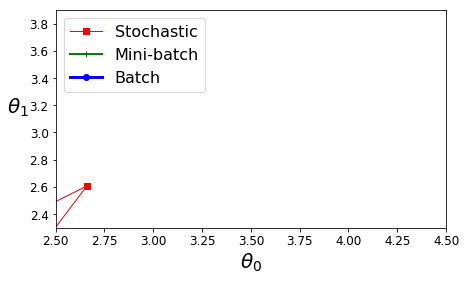

In [57]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

Let's compare below the algorithms we've discussed so far for Linear Regression. 

m = the number of training instances
n = number of features

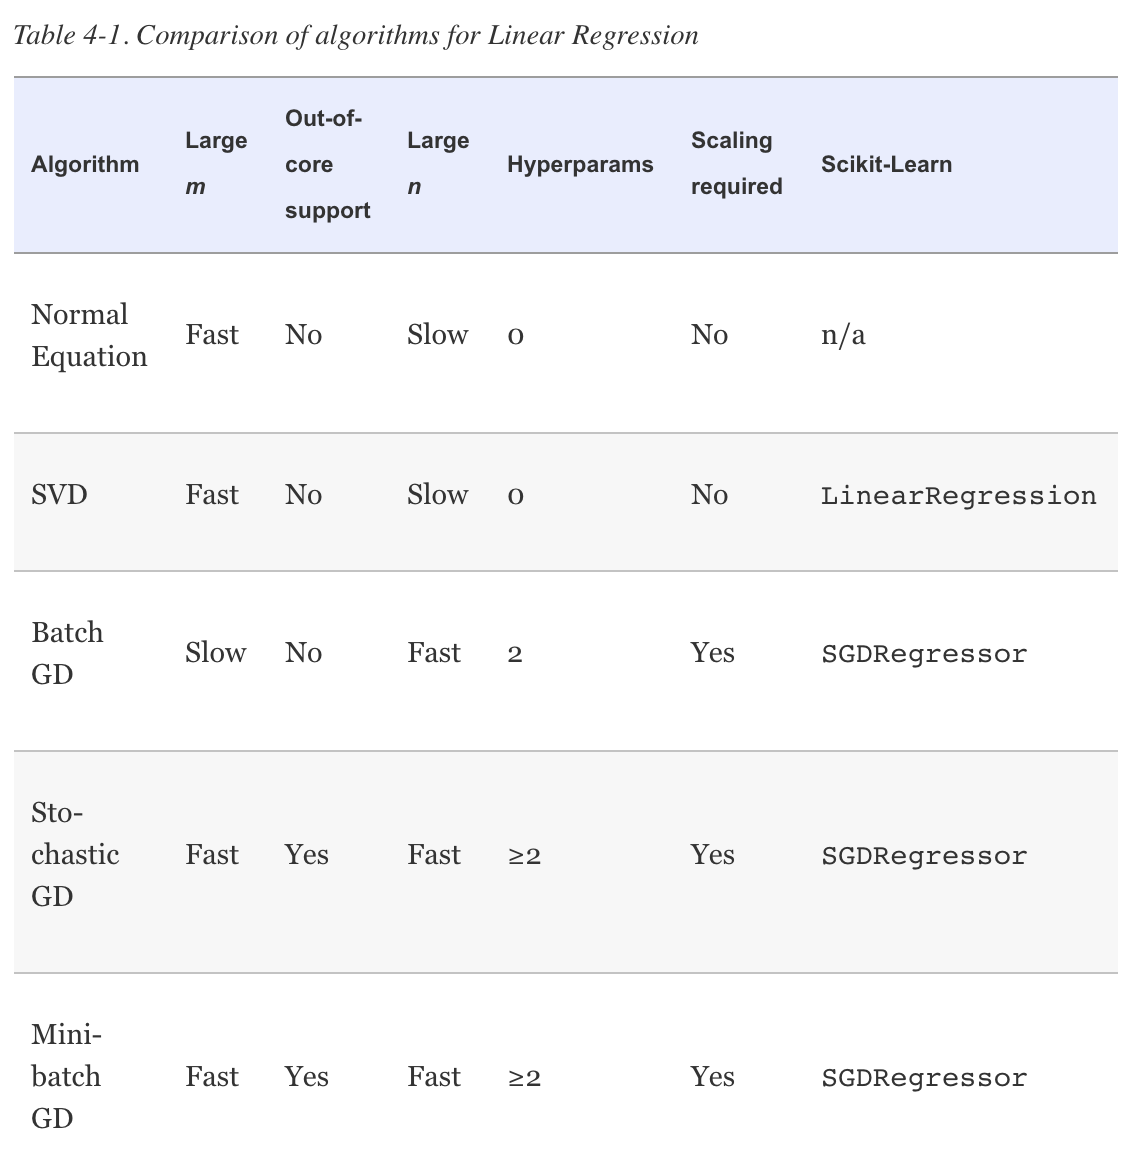

# Polynomial Regression

What if your data is actually more complex than a simple straight line? One technique called polynomial regression, has you add powers of each feature as new features, and then train a linear model on the extended set of features.

In [58]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)

In [59]:
# Generate some nonlinear data, based on a quadratic (y = ax2 + bx +c) equation (plus some noise)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

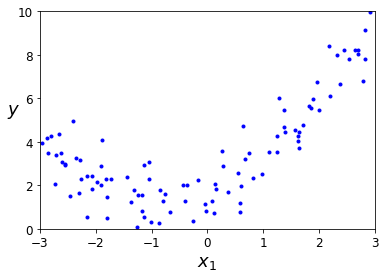

In [60]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [61]:
# Clearly a straight line will never fit this data properly. So let's use Scikit-Learn's PolynomialFeatures
# class to transform our training data, adding the square (2nd degree polynomial) of each feature in the
# training set as new features

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [62]:
X[0]

array([-0.75275929])

In [63]:
X_poly[0] # Now contains the original feature of X plus the square of this feature

array([-0.75275929,  0.56664654])

In [64]:
# Now we fit a LinearRegression model to this extended training data

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

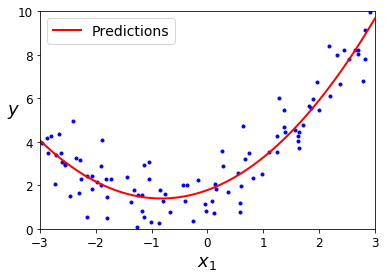

In [65]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

# Learning Curves